## ML Part 2-4. Decision Tree & Ensamble

## 1.의사 결정 트리(Decision Tree)
- 지도 학습
- 일련의 질문에 근거하여 주어진 데이터를 소집단으로 분류하는 분석 기법
- 최적의 질문 찾기
  - 정보이득(Information Gain)이 최대가 되도록
  - 데이터 불순도(Impurity)가 최소가 되도록
  - 데이터 불순도 측정법 : 지니 인덱스(Gini Index), 엔트로피(Entropy)
  - 다른 알고리즘에 비해 시간이 오래 걸림
  - https://m.blog.naver.com/samsjang/220976772778

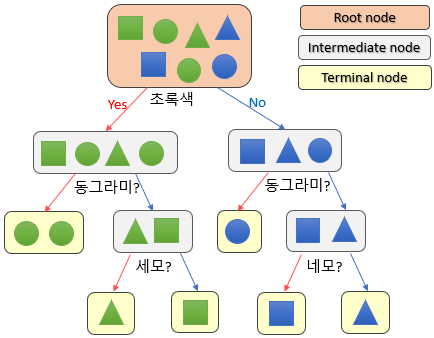

In [ ]:
모양 또는 색 중에서 무엇을 먼저, 어떤 기준으로 나누어야 할까?
=> 불순도가 낮아지는 방향으로 나누어야 한다!
=> 방법으로 ID3, CART, C4.5 등이 있다
  - 불순도가 낮은 것부터 질문으로 사용함, 불순도가 높은 경우 많은 정보를 가지고 있어 구분이 어려움

### 1-01. 불순도(Impurity)
- 동일하지 않은 것이 섞여 있는 정도
- 불순도를 수치화한 지표 : 엔트로피(Entropy)와 지니계수(GiniIndex)
- ID3 : 불순도 계산에 Entropy를 사용한 알고리즘 
- CART : 불순도 계산에 Gini-Index를 사용한 알고리즘
- ID3 설명 : ```https://leedakyeong.tistory.com/entry/Decision-Tree%EB%9E%80-ID3-%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98``` 

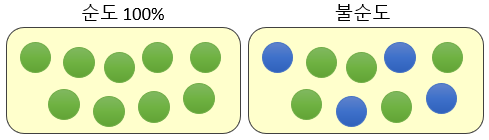

### 1-02. 엔트로피(Entropy)
- 불순도 측정지표, 정보량의 기댓값
> 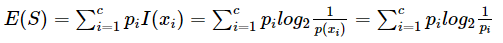
- S : 이미 발생한 사건의 모음, c : 사건의 개수
- I(x) : 어떤 사건이 가지고 있는 정보의 양
- p(x) : 사건 x가 발생할 확률

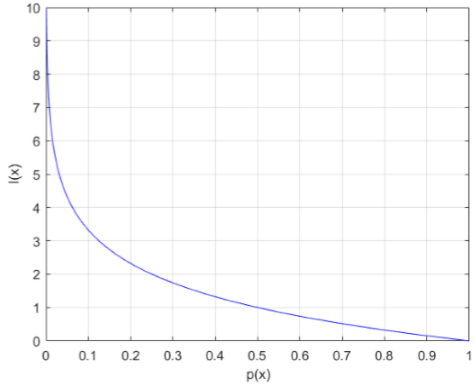

- 사건 x가 발생할 확률을 x측, 정보량을 y축으로 그린 그래프를 보면 **사건 x가 발생할 확률이 증가할수록, 정보량은 0에 수렴한다**
   - 즉, 흔하게, 자주 발생하는 사건일수록 그닥 많은 정보를 가지고 있지 않다
   - 순도 100% 에서는 정보량이 0에 수렴하므로 Entropy는 0이며, 
   - 두 사건이 일어날 확률이 0.5, 0.5로 일 때(불순한 상태, 분류하기 어려운 상태) Entropy가 최대값 1을 갖음
   - 불순한 상태일수록 Entropy가 큰 값을 갖고, 분류하기 어려움
   - **Entropy가 가장 작은 것을 상위 의사결정 노드에 위치하며 가지를 뻗어나가며, 의사결정나무를 키워나가는 것이 ID3 알고리즘의 핵심**

### 1-03. ID3 알고리즘
- ID3 알고리즘 : Entropy로 불순도 계산, **독립변수가 모두 범주형**일 때만 가능함
   - 연속형 변수도 가능하도록 발전한 것이 C4.5 알고리즘
- 정보획득량(Information Gain) : 분할 전 Entropy와 분할 후 Entropy의 차이
> image.png
- A : 속성(Feature), E : Entropy, S : Target Feature
- **정보획득량이 크다는 것은 어떤 속성으로 분할 했을 때 불순도가 줄어든다는 것을 의미함**
- 모든 속성(Feature)에 대해 분할 후 정보획득량을 계산하고, **정보획득량이 가장 큰 속성부터 분할**의 기준으로 함
- 즉 **Entropy가 작은 것부터 분할**의 기준으로 함

### 1-04. 지니 계수(Gini Index)
- 불순도 측정 지표, 데이터의 통계적 분산정도를 정량화해서 표현한 값
> 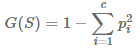
- S : 이미 발생한 사건의 모음, c : 사건의 개수
- **Gini Index가 클수록 "데이터가 분산"되어 있음**
- CART 알고리즘에서는 **Gini Index가 작은** 방법으로 먼저 분류함

### 1-05. CART 알고리즘


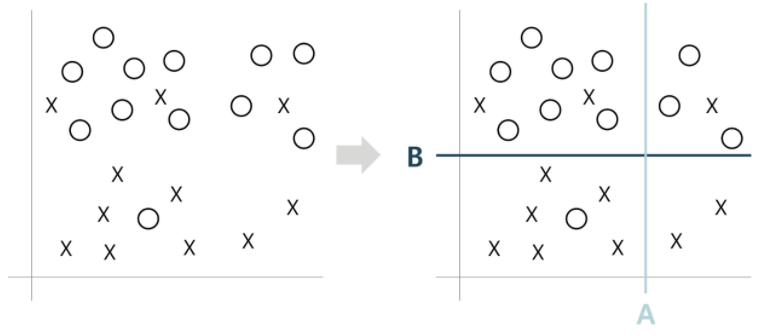

In [ ]:
A와 B로 각 각 분할 했을 때의 지니계수는?

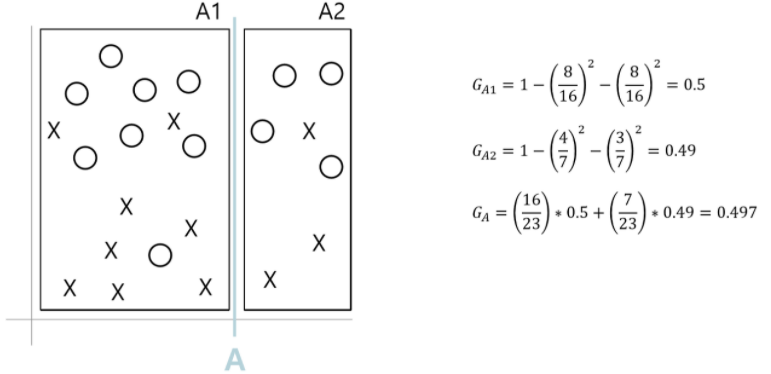

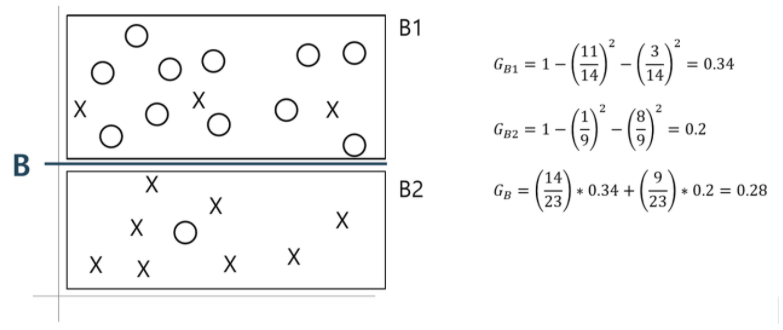

In [ ]:
지니계수는 불순도를 의미하므로 불순도가 더 적은 B로 먼저 분할하는 것이 좋음!

## 2.Decision Tree - 이상형 고르기 

- 외모, 성격, 건강을 조건으로 이상형을 분류하는 예제
> 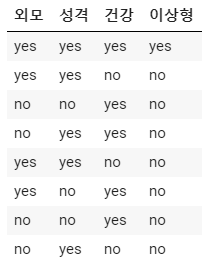


- sklearn.tree.DecisionTreeClassifier(*, criterion, ...)
  - criterion : 'gini'(default), 'entropy'
  - max_depth = None, 트리의 최대 깊이
  - min_sample_split = 2, 노드내에서 분할이 필요한 최소의 샘플 수
  - max_features = None, 최적의 분할을 찾기 위해 고려할 Feature의 수
     - int : Feature의 수, float : 비율, or {'auto', 'sqrt', 'log2'}
  - max_leaf_nodes=None : 최대 말단 노드 개수
  - ```feature_importances_``` : 가장 많은 분류를 만든 속성

- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 2-01. Decision Tree - 이상형(entropy)

In [11]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

# 1 : yes, 2 : no
data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_ent = DecisionTreeClassifier(criterion='entropy')  #criterion : special feature
tree_ent.fit(X,y)
print("Train Accurray: ", tree_ent.score(X, y))
print(tree_ent.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


### 2-02. Decision Tree - 이상형(Gini)

In [12]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier

data = np.array([[1,1,1,1],
                 [1,1,0,0],
                 [0,0,1,0],
                 [0,1,1,0],
                 [1,1,0,0],
                 [1,0,1,0],
                 [0,0,1,0],
                 [0,1,0,0]])

X = data[:, :-1]
y = data[:, -1]
print(X, y)

tree_gini = DecisionTreeClassifier(random_state=0)  # criterion = 'gini' (default)
tree_gini.fit(X,y)
print("Train Accurray: ", tree_gini.score(X, y))

print(tree_gini.predict(X))

[[1 1 1]
 [1 1 0]
 [0 0 1]
 [0 1 1]
 [1 1 0]
 [1 0 1]
 [0 0 1]
 [0 1 0]] [1 0 0 0 0 0 0 0]
Train Accurray:  1.0
[1 0 0 0 0 0 0 0]


## 3.Decision Tree 시각화
- pydotplus
    - pip install pydotplus
- grphviz
    - 실행파일 설치 : https://graphviz.gitlab.io/download/
    - windows : https://graphviz.gitlab.io/_pages/Download/Download_windows.html
    - `pip install graphviz`


In [18]:
!pip3 install pydotplus graphviz

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3 -m pip install --upgrade pip' command.


In [19]:
# out_file=None : 결과를 파일로 저장하지 않겠다.
# filled=True : 상자 채우기
# rounded=True : 상자모서리 둥그렇게 만들기
# special_characters=True : 상자안에 내용 넣기

In [20]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.core.display import Image

def showTree(dt, feature_names, class_names):
    dot_data = export_graphviz(dt,
                    out_file=None,
                    feature_names=feature_names,
                    class_names=class_names,
                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return Image(graph.create_png())

In [21]:
# 첫번째 줄 : 분류 기준
# entropy : 엔트로피값
# sample : 분류한 데이터 개수
# value : 클래스별 데이터 개수
# class : 예측한 답

In [23]:
showTree(tree_ent, ["Appearance", "Character", "Health"], ["No", "Yes"])

InvocationException: GraphViz's executables not found

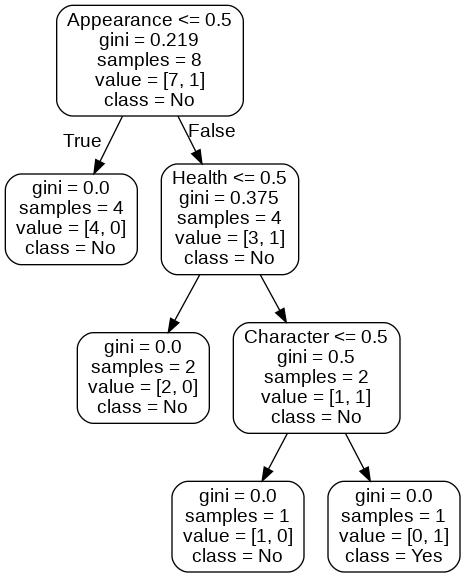

In [19]:
showTree(tree_gini, ["Appearance", "Character", "Health"], ["No", "Yes"])

## 4.Decision Tree의 예

### 4-01. Decision Tree - iris

In [24]:
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
from IPython.core.display import Image

def showTree(dt, feature_names, class_names):
    dot_data = export_graphviz(dt,
                    out_file=None,
                    feature_names=feature_names,
                    class_names=class_names,
                    rounded=True)
    graph = pydotplus.graph_from_dot_data(dot_data) 
    return Image(graph.create_png())

In [25]:
import matplotlib.pyplot as plt
import numpy as np

def drawBarh(data, tree, figsize= (5, 8)) :
    plt.figure(figsize=figsize)
    n = len(data.feature_names)
    
    # feature_importances_ 를 사용하면 중요한 속성을 확인할 수 있음
    plt.barh(range(n), tree.feature_importances_, align='center')
    plt.yticks(np.arange(n), data.feature_names)
    plt.xlabel("feature importance")
    plt.ylabel('features')
    plt.show()    

In [26]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

def decisionTree_lab(data, criterion, depth=None):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                        #data.data[:, 1:],   # iris
                                        #data.data[:, [10, 11,18, 20, 21, 26, 27]],   # cancer
                                        data.data,
                                        data.target,
                                        stratify=data.target,
                                        random_state=42 )
    rState = 0
    tree = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=rState)
    tree.fit(X_train, y_train)
    trainAccuracy = tree.score(X_train, y_train)
    testAccuracy  = tree.score(X_test, y_test)
    return tree, trainAccuracy, testAccuracy

In [29]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_trees = []
for criterion in ('gini', 'entropy') :
    print(criterion)
    print('-'*70)
    for x, depth in enumerate([None, 2, 4]) :
        cTree, trainAccuracy, testAccuracy = decisionTree_lab(iris, criterion, depth)
        iris_trees.append(cTree)    
        print(f'Train Accuracy(depth={depth}): {trainAccuracy*100:.3f}%')
        print(f'Test  Accuracy(depth={depth}): {testAccuracy*100:.3f}%')
        print("feature importance:", cTree.feature_importances_)
        print('-'*70)

gini
----------------------------------------------------------------------
Train Accuracy(depth=None): 100.000%
Test  Accuracy(depth=None): 92.105%
feature importance: [0.01339392 0.         0.42885581 0.55775026]
----------------------------------------------------------------------
Train Accuracy(depth=2): 96.429%
Test  Accuracy(depth=2): 92.105%
feature importance: [0.         0.         0.43940082 0.56059918]
----------------------------------------------------------------------
Train Accuracy(depth=4): 99.107%
Test  Accuracy(depth=4): 92.105%
feature importance: [0.01366854 0.         0.42398002 0.56235144]
----------------------------------------------------------------------
entropy
----------------------------------------------------------------------
Train Accuracy(depth=None): 100.000%
Test  Accuracy(depth=None): 92.105%
feature importance: [0.01126742 0.         0.32081279 0.66791979]
----------------------------------------------------------------------
Train Accuracy(dept

In [ ]:
# 3개만 가지고 test 했을 때
gini
----------------------------------------------------------------------
Train Accuracy(depth=None): 100.000%
Test  Accuracy(depth=None): 97.368%
feature importance: [0.02678785 0.57114419 0.40206796]
----------------------------------------------------------------------
Train Accuracy(depth=2): 96.429%
Test  Accuracy(depth=2): 94.737%
feature importance: [0.         0.56059918 0.43940082]
----------------------------------------------------------------------
Train Accuracy(depth=4): 99.107%
Test  Accuracy(depth=4): 97.368%
feature importance: [0.01357576 0.5788979  0.40752634]
----------------------------------------------------------------------
entropy
----------------------------------------------------------------------
Train Accuracy(depth=None): 100.000%
Test  Accuracy(depth=None): 97.368%
feature importance: [0.02253484 0.67642542 0.30103974]
----------------------------------------------------------------------
Train Accuracy(depth=2): 96.429%
Test  Accuracy(depth=2): 94.737%
feature importance: [0.         0.66478753 0.33521247]
----------------------------------------------------------------------
Train Accuracy(depth=4): 99.107%
Test  Accuracy(depth=4): 97.368%
feature importance: [0.01139582 0.68413384 0.30447034]
----------------------------------------------------------------------

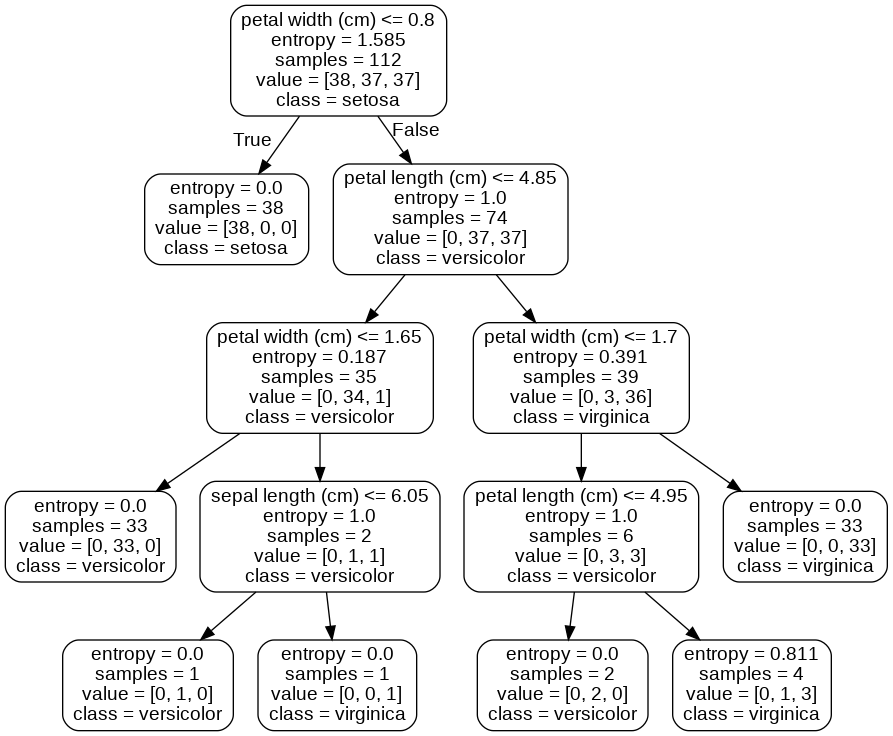

In [25]:
showTree(iris_trees[-1], iris.feature_names, iris.target_names)

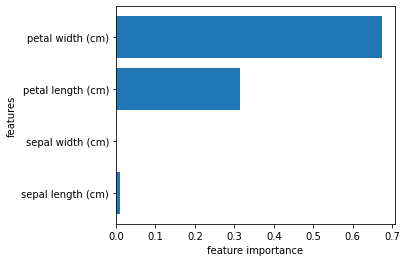

In [26]:
drawBarh(iris, iris_trees[-1], (5, 4))

### 4-02. Decision Tree - 유방암 

In [27]:
from sklearn.datasets import load_breast_cancer

bestAccuracy = 0.0
bestTree = None

cancer_trees = []
cancer = load_breast_cancer()
for criterion in ('gini', 'entropy') :
    print(criterion)
    print('-'*70)
    for x, depth in enumerate([None, 2, 4, 5]) :    
        cTree, trainAccuracy, testAccuracy = decisionTree_lab(cancer, criterion, depth)
        cancer_trees.append(cTree)    
        print(f'Train Accuracy(depth={depth}): {trainAccuracy*100:.3f}%')
        print(f'Test  Accuracy(depth={depth}): {testAccuracy*100:.3f}%')
        print("feature importance:\n", cTree.feature_importances_ )
        if testAccuracy > bestAccuracy :
            bestAccuracy = testAccuracy
            bestTree = cTree
        print('-'*70)

gini
----------------------------------------------------------------------
Train Accuracy(depth=None): 100.000%
Test  Accuracy(depth=None): 93.706%
feature importance:
 [0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]
----------------------------------------------------------------------
Train Accuracy(depth=2): 95.775%
Test  Accuracy(depth=2): 90.909%
feature importance:
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.05393525
 0.         0.         0.         0.         0.         0.
 0.         0.         0.80998121 0.         0.         0.
 0.         0.         0.         0.13608354 0.         0.        ]
----------------------------------------

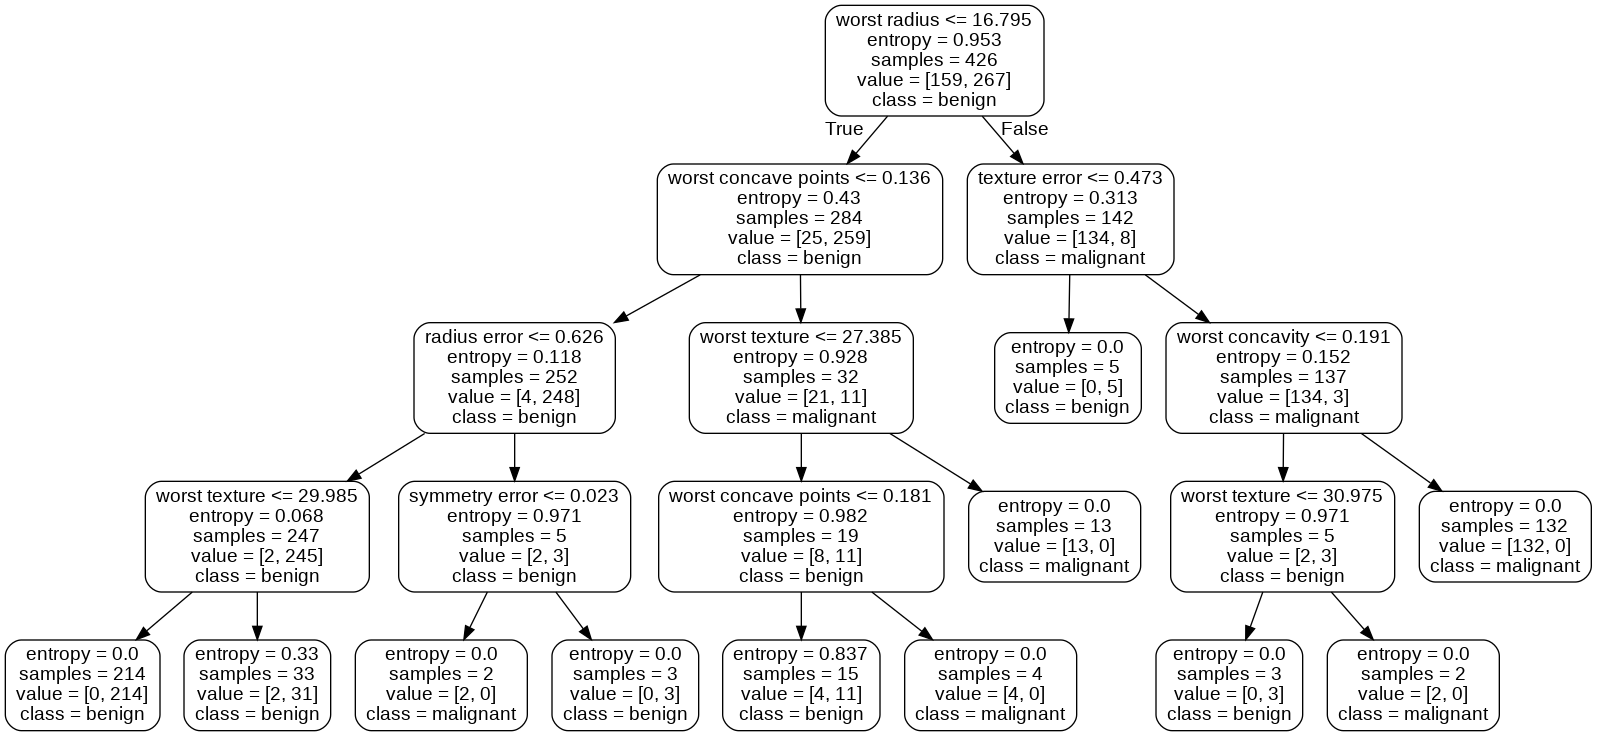

In [29]:
showTree(bestTree, cancer.feature_names, cancer.target_names)

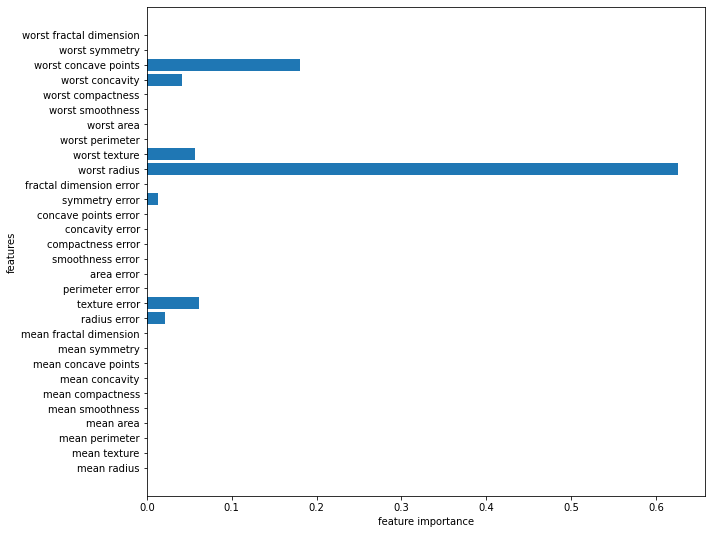

In [30]:
drawBarh(cancer, bestTree, (10, 9))

In [ ]:
의미있는 데이터 번호
data = data[:, [10, 11,18, 20, 21, 26, 27]]

## 5.Ensamble(앙상블) 기법
- Ensamble : 뒤섞다라는 의미
- 여러 개의 Model을 조합하여 Overfitting을 방지하고 예측의 정확도를 높히는 방법
- Random Forest는 여러 개의 Decision Tree로 만들어진 모델을 조합
- 하지만, 같은 알고리즘으로 만들어진 모델들로 조합할 필요는 없음
- 여러 가지 다른 알고리즘으로 모델을 만들고, 이들을 조합하는 것도 Ensamble!

### 5-01. Voting - 손글씨
- 서로 다른 알고리즘 분류기 결합
- 각 모델의 결과를 취합하여 가장 많은 결과로 나온 것을 결과로 채택하는 것
- 일반적으로 범주형 데이터에서 사용함 


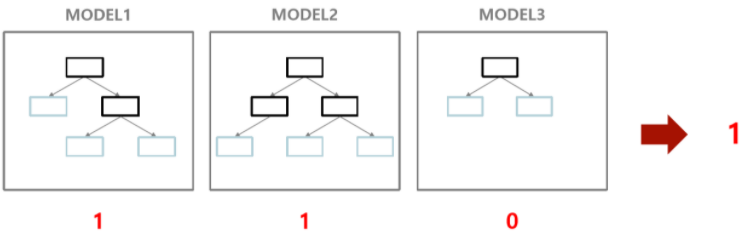

- Hard voting(직접투표)
   - 각 모델의 예측 결과 중 많은 것을 선택
   - 1 예측 3표, 2예측 1표 -> 1예측 선택

  > 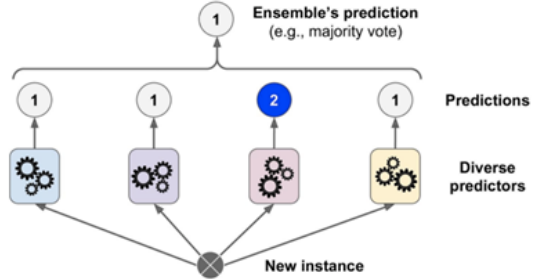

- Soft voting(간접투표)
  - 각 모델의 클래스(1, 2클래스) 확률을 구하고 평균 높은 확률을 선택
  - 1예측 : (0.9 + 0.8 + 0.3 + 0.4) / 4 = 0.6  => 선택
  - 2예측 : (0.1 + 0.2 + 0.7 + 0.6) / 4 = 0.4
  - weight를 주는 방식도 있음
- 일반적으로 soft voting이 고성능  
  > 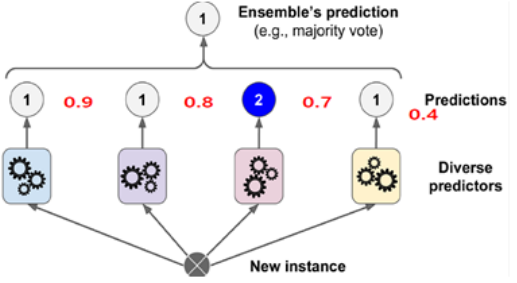

- **sklearn.ensamble.VotingClassifier(estimators, voting, ...)**
  - estimators : voting에 참여할 모델들, [('str', estimator), ...]
  - voting : 'hard'(default), 'soft'

In [ ]:
from sklearn import model_selection
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings   # Suppress Deprecation and Incorrect Usage Warnings
warnings.filterwarnings('ignore')

digits = datasets.load_digits()
X_train, X_test, y_train, y_test = model_selection.train_test_split(digits.data,
                                                                    digits.target,
                                                                    random_state=0)

lr  = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)
dt  = DecisionTreeClassifier(max_depth=10)
voting = VotingClassifier(estimators=[('LR', lr), ('KNN', knn), ('dt', dt)], voting='soft')#, weights=[2, 1, 1])

for cl in [voting, lr, knn, dt] :
    cl.fit(X_train, y_train)
    pred = cl.predict(X_test)
    name = cl.__class__.__name__
    print(f'{name} Accuracy: {accuracy_score(y_test, pred)*100:.2f}%')


VotingClassifier Accuracy: 98.00%
LogisticRegression Accuracy: 95.11%
KNeighborsClassifier Accuracy: 97.78%
DecisionTreeClassifier Accuracy: 83.11%


### 5-02. Bagging, RandomForest - 손글씨
- Bootstrap Aggregating
- 같은 알고리즘 결합, 서로 다른 훈련 데이타 샘플로 훈련
- 샘플을 여러 번 뽑아(bootstrap) 각 모델을 학습시킨 결과를 집계(aggregation)
- RandomForest : 대표적인 bagging 알고리즘

  > 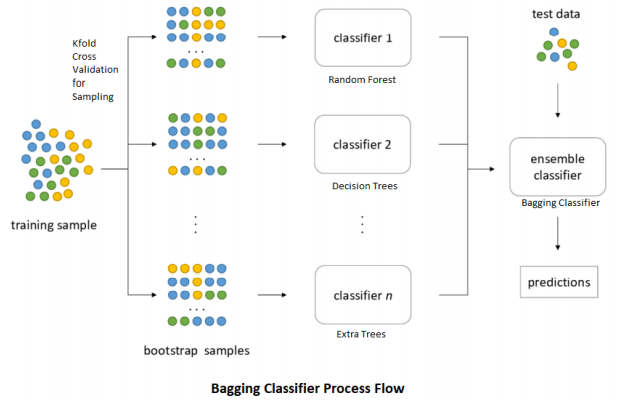

- **sklearn.ensamble.RandomForestClassifier(n_estimators, max_features, ...)**
  - n_estimators : 생성할 트리의 개수, 클수록 좋지만 훈련시간과 메모리 부담
  - 생성된 트리는 estimator_ 속성으로 확인
  - max_features : 선택할 무작위 특성의 개수, 핵심 변수, 기본값 사용 권장
     - 값이 크면 트리들이 비슷해지고, 작으면 트리들이 달라지고 깊어짐
  - random_state : 생성할 때 마다 달라 질 수 있으므로 같은 결과를 원하면 값 고정

In [ ]:
## Bagging - 손글씨 예제
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import ensemble
import numpy as np, cv2

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.3)

dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train,y_train)

forest = ensemble.RandomForestClassifier(n_estimators=300, random_state=0, max_depth=10)
forest.fit(X_train,y_train)

print(f"DTree :Train acc :{dt.score(X_train, y_train):.4f}, Test acc : {dt.score(X_test, y_test):.4f}")
print(f"RFroest:Train acc :{forest.score(X_train, y_train):.4f}, Test acc :{forest.score(X_test, y_test):.4f}")


DTree :Train acc :0.9912, Test acc : 0.8426
RFroest:Train acc :1.0000, Test acc :0.9759


### 5-03. Boosting - 손글씨
- 여러 모델이 **순차적으로 학습**
- 이전 모델의 결과에 따라 **다음 모델에 가중치를 부여함**
- 맞추기 어려운 문제를 맞추는데 초점이 맞춰져 있음
- 이상치(Outlier)에 약함
- AdaBoost, XGBoost, GradientBoost 등 다양한 모델이 있으며, XGBoost 모델은 강력한 성능을 보임

> 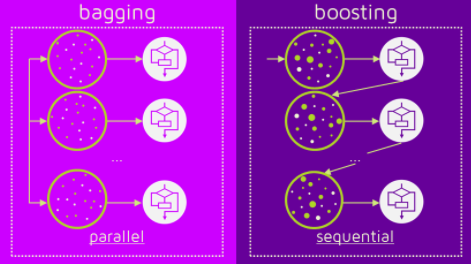

- sklearn.ensemble.AdaBoostClassifier(base_estimator)
- sklearn.ensemble.GradientBoostingClassifier(max_depth)
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [ ]:
# XGBoost 의 사용 - sklearn아님
https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn

In [ ]:
## Boosting - 손글씨 예제
from sklearn import model_selection
from sklearn import ensemble
from sklearn.datasets import load_digits

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0, test_size=0.3)

ada = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=10))
gbm = ensemble.GradientBoostingClassifier(max_depth=3)

for boost in [ada, gbm]:
    boost.fit(X_train, y_train)
    print(f'{type(boost).__name__:<28} train Acc : {boost.score(X_train, y_train):.4f}%, \
          Test Acc : {boost.score(X_test, y_test):.4f}%')

AdaBoostClassifier           train Acc : 1.0000%,           Test Acc : 0.9815%
GradientBoostingClassifier   train Acc : 1.0000%,           Test Acc : 0.9500%


### 5-04. Stacking - 유방암
- Meta Modeling 이라고도 함
- 'Two heads are better then one' 이라는 아이디어에서 출발
- 여러 서로 다른 모델을 조합해서 최고의 성능을 내는 모델을 생성
   - SVM, RandomForest, kNN 등의 다양할 알고리즘
- 여러 모델이 예측한 결과 값을 다른 모델의 학습 데이터로 입력하여 재학습
- 성능 보장이 되지 않음
- sklearn API 구현 없음

In [ ]:
import numpy as np
from sklearn import model_selection
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

cancer = datasets.load_breast_cancer()
X_train, X_test, y_train, y_test = model_selection.train_test_split(cancer.data,
                                                        cancer.target,
                                                        random_state=0)
print(f'X_test shape : {X_test.shape}')
knn = KNeighborsClassifier(4)
rf  = RandomForestClassifier(n_estimators=100, random_state=0)
dt  = DecisionTreeClassifier()
ada = ensemble.AdaBoostClassifier(n_estimators=100)

knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
dt.fit(X_train, y_train)
ada.fit(X_train, y_train)

knn_pred = knn.predict(X_test)
rf_pred  = rf.predict(X_test)
dt_pred  = dt.predict(X_test)
ada_pred = ada.predict(X_test)

print(f'KNN Accuracy: {accuracy_score(y_test, knn_pred)}%')
print(f'RandomForest Accuracy: {accuracy_score(y_test, rf_pred)}%')
print(f'DTree Accuracy: {accuracy_score(y_test, dt_pred)}%')
print(f'AdaBoost Accuracy: {accuracy_score(y_test, ada_pred)}%')

preds = np.array([knn_pred, rf_pred, dt_pred, ada_pred]).T
print(f'preds shape : {preds.shape}')
lr = LogisticRegression(C=10)
lr.fit(preds, y_test)
print(f'Final Accuracy: {lr.score(preds, y_test)}%')


X_test shape : (143, 30)
KNN Accuracy: 0.9230769230769231%
RandomForest Accuracy: 0.972027972027972%
DTree Accuracy: 0.9020979020979021%
AdaBoost Accuracy: 0.986013986013986%
preds shape : (143, 4)
Final Accuracy: 0.986013986013986%
